# Stroke Prediction 1: Prepare Data


### What is Stroke?

Stroke is a disease that affects the arteries leading to and within the brain. It is the  No. 5 cause of death and a leading cause of disability in the United States.

A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens , part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.

![title](stroke_brain.jpg)

In this project, I will make prediction on whether a patient has stroke based on several given features.


## Part 1: Data exploration
### Understand raw data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)# display all the columns

In [2]:
train_data = pd.read_csv("train_2v.csv")
test_data = pd.read_csv("test_2v.csv")

In [3]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
print ("Number of rows: " + str(train_data.shape[0])) # row count
print ("Number of columns: " + str(train_data.shape[1])) # column count

Number of rows: 43400
Number of columns: 12


In [5]:
test_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [6]:
print ("Number of rows: " + str(test_data.shape[0])) # row count
print ("Number of columns: " + str(test_data.shape[1])) # column count

Number of rows: 18601
Number of columns: 11


Here we have 12 columns in training data in total.

1 id-Patient ID

2 gender-Gender of Patient, Male or Female

3 age-Age of Patient

4 hypertension-0: no hypertension; 1: suffering from hypertension

5 heart_disease-0: no heart disease; 1: suffering from heart disease

6 ever_married-Yes/No

7 work_type-Type of occupation

8 Residence_type-Area type of residence (Urban/ Rural)

9 avg_glucose_level-Average Glucose level (measured after meal)

10 bmi-Body mass index

11 smoking_status-patient’s smoking status

12 stroke-0: no stroke;1: suffered stroke

In [7]:
train_data.describe() # descriptive statistics 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


Text(0,0.5,'Count')

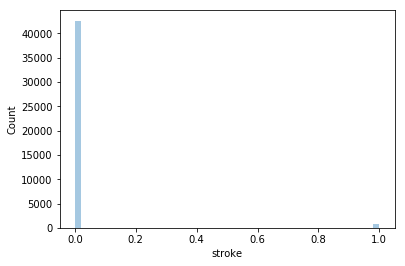

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.distplot(train_data['stroke'],kde=False) # The outcome is labeled as 'class'
plt.ylabel("Count")

In [9]:
train_data.groupby('stroke')[['stroke']].count() 

,stroke
stroke,
0,42617
1,783


As we can see from above, the dataset is highly imbalanced. We have 42617 healthy people and 783 stroke patients. 

In [10]:
train_data.isnull().values.any() # check missing data

True

The dataset has missing data.

In [11]:
train_data.columns[train_data.isna().any()].tolist()# find out which columns have missing data

['bmi', 'smoking_status']

In [12]:
def get_percentage_missing(series):
    # Calculates percentage of NaN values in DataFrame
 
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)

In [13]:
get_percentage_missing(train_data)

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  0.03
smoking_status       0.31
stroke               0.00
dtype: float64

From above, we know that bmi has 3 percent of missing data, while smoking_status has 31 percent of missing data.

### Understand the features

In [14]:
train0 = train_data.loc[train_data['stroke'] == 0]
train1 = train_data.loc[train_data['stroke']== 1]

Gender preference for stroke patients

In [15]:
train0.groupby('gender')[['gender']].count() 

,gender
gender,
Female,25234
Male,17372
Other,11


In [16]:
train1.groupby('gender')[['gender']].count() 

,gender
gender,
Female,431
Male,352


In [17]:
labels = ['Female', 'Male','Other']
sizes0 = [25234, 17372, 11]
sizes1 = [431, 352, 0]

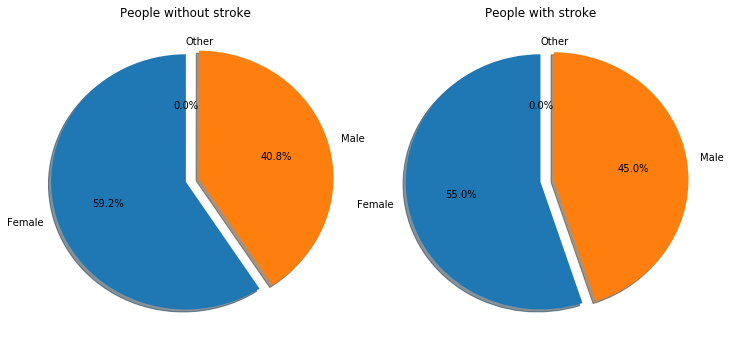

In [18]:
# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
explode = (0, 0.1,0)# only "explode" the 2nd slice
ax[0].pie(sizes0, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[0].set_title('People without stroke')
ax[1].pie(sizes1, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[1].set_title('People with stroke')
plt.tight_layout()
plt.show()

Age trend for stroke patients

Text(0,0.5,'count')

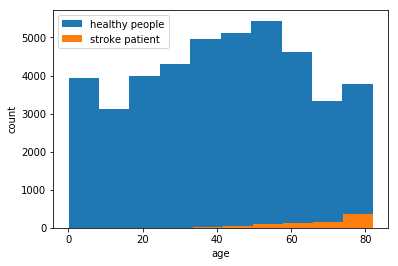

In [19]:
plt.hist(train0['age'])
plt.hist(train1['age'])
plt.legend(['healthy people', 'stroke patient'])
plt.xlabel('age')
plt.ylabel('count')

Relationship between hypertension and stroke?

In [20]:
train0.groupby('hypertension')[['hypertension']].count() 

,hypertension
hypertension,
0,38756
1,3861


In [21]:
train1.groupby('hypertension')[['hypertension']].count() 

,hypertension
hypertension,
0,583
1,200


In [22]:
labels = ['No hypertension', 'Has hypertension']
sizes0 = [38756, 3861]
sizes1 = [583, 200]

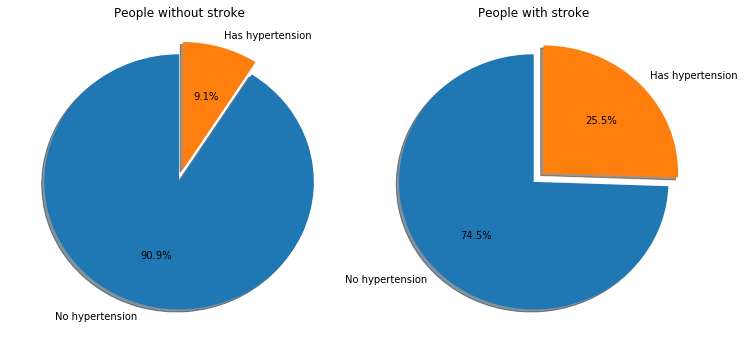

In [23]:
# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
explode = (0, 0.1)# only "explode" the 2nd slice
ax[0].pie(sizes0, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[0].set_title('People without stroke')
ax[1].pie(sizes1, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[1].set_title('People with stroke')
plt.tight_layout()
plt.show()

Relationship between heart disease and stroke?

In [24]:
train0.groupby('heart_disease')[['heart_disease']].count() 

,heart_disease
heart_disease,
0,40732
1,1885


In [25]:
train1.groupby('heart_disease')[['heart_disease']].count() 

,heart_disease
heart_disease,
0,606
1,177


In [26]:
labels = ['Has heart disease', 'No heart disease']
sizes0 = [40732, 1885]
sizes1 = [606, 177]

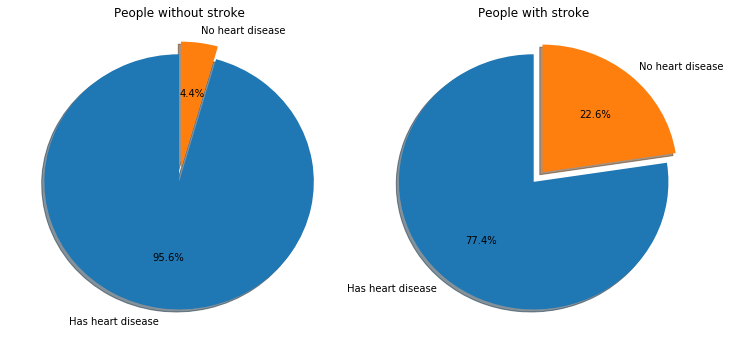

In [27]:
# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
explode = (0, 0.1)# only "explode" the 2nd slice
ax[0].pie(sizes0, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[0].set_title('People without stroke')
ax[1].pie(sizes1, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[1].set_title('People with stroke')
plt.tight_layout()
plt.show()

Can we see correlation between marriage and stroke?

In [28]:
train0.groupby('ever_married')[['ever_married']].count() 

,ever_married
ever_married,
No,15382
Yes,27235


In [29]:
train1.groupby('ever_married')[['ever_married']].count() 

,ever_married
ever_married,
No,80
Yes,703


In [30]:
labels = ['Married', 'No marriage']
sizes0 = [15382, 27235]
sizes1 = [80, 703]

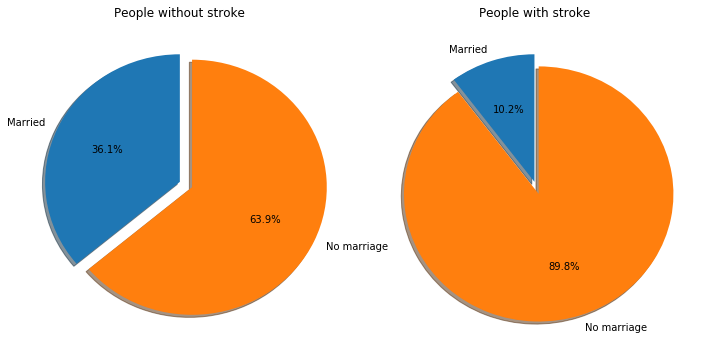

In [31]:
# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
explode = (0, 0.1)# only "explode" the 2nd slice
ax[0].pie(sizes0, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[0].set_title('People without stroke')
ax[1].pie(sizes1, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[1].set_title('People with stroke')
plt.tight_layout()
plt.show()

How about work type?

In [32]:
train0.groupby('work_type')[['work_type']].count() 

,work_type
work_type,
Govt_job,5351
Never_worked,177
Private,24393
Self-employed,6542
children,6154


In [33]:
train1.groupby('work_type')[['work_type']].count() 

,work_type
work_type,
Govt_job,89
Private,441
Self-employed,251
children,2


In [34]:
labels = ['Govt_job','Never_worked', 'Private','Self-employed','children']
sizes0 = [5351, 177, 24393, 6542, 6154]
sizes1 = [89, 0,441, 251, 2]

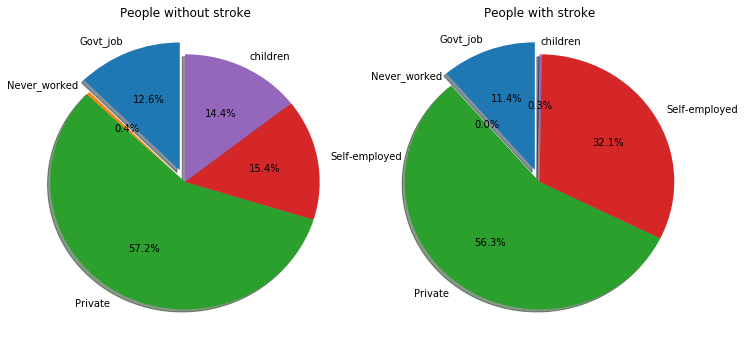

In [35]:
# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
explode = (0.1, 0,0,0,0) 
ax[0].pie(sizes0, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[0].set_title('People without stroke')
ax[1].pie(sizes1, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[1].set_title('People with stroke')
plt.tight_layout()
plt.show()

Does residence type have some influence?

In [36]:
train0.groupby('Residence_type')[['Residence_type']].count() 

,Residence_type
Residence_type,
Rural,21260
Urban,21357


In [37]:
train1.groupby('Residence_type')[['Residence_type']].count() 

,Residence_type
Residence_type,
Rural,384
Urban,399


In [38]:
labels = ['Rural', 'Urban']
sizes0 = [21260, 21357]
sizes1 = [384, 399]

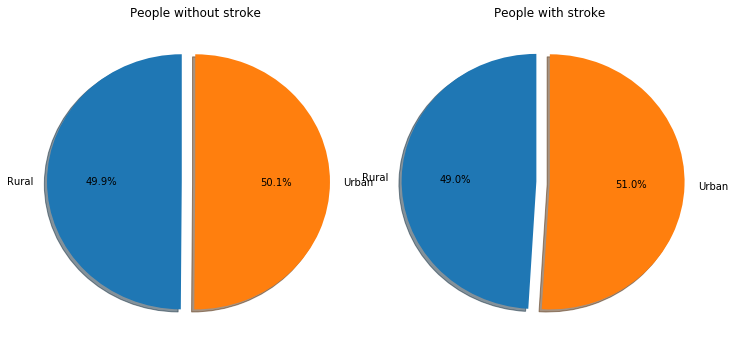

In [39]:
# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
explode = (0.1,0) 
ax[0].pie(sizes0, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[0].set_title('People without stroke')
ax[1].pie(sizes1, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[1].set_title('People with stroke')
plt.tight_layout()
plt.show()

How about average glucose level?

Text(0,0.5,'count')

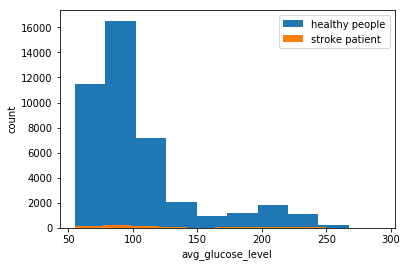

In [40]:
plt.hist(train0['avg_glucose_level'])
plt.hist(train1['avg_glucose_level'])
plt.legend(['healthy people', 'stroke patient'])
plt.xlabel('avg_glucose_level')
plt.ylabel('count')

In [41]:
print("Average glucose level for healthy people is: ")
train0['avg_glucose_level'].mean()

Average glucose level for healthy people is: 


104.02159044512753

In [42]:
print("Average glucose level for stroke patient is: ")
train1['avg_glucose_level'].mean()

Average glucose level for stroke patient is: 


129.5826692209451

Does bmi have correlation with stroke?

Text(0,0.5,'count')

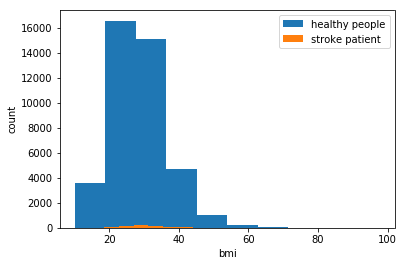

In [43]:
plt.hist(train0['bmi'].dropna())
plt.hist(train1['bmi'].dropna())
plt.legend(['healthy people', 'stroke patient'])
plt.xlabel('bmi')
plt.ylabel('count')

In [44]:
print("Average bmi for healthy people is: ")
train0['bmi'].mean()

Average bmi for healthy people is: 


28.58537111030391

In [45]:
print("Average bmi for stroke patient is: ")
train1['bmi'].mean()

Average bmi for stroke patient is: 


29.868118195956455

How about smoking status?

In [453]:
train0.groupby('smoking_status')[['smoking_status']].count() 

,smoking_status
smoking_status,
formerly smoked,7272
never smoked,15769
smokes,6429


In [454]:
train1.groupby('smoking_status')[['smoking_status']].count() 

,smoking_status
smoking_status,
formerly smoked,221
never smoked,284
smokes,133


In [455]:
labels = ['formerly smoked', 'never smoked','smokes']
sizes0 = [7272, 15769, 6429]
sizes1 = [221, 284, 133]

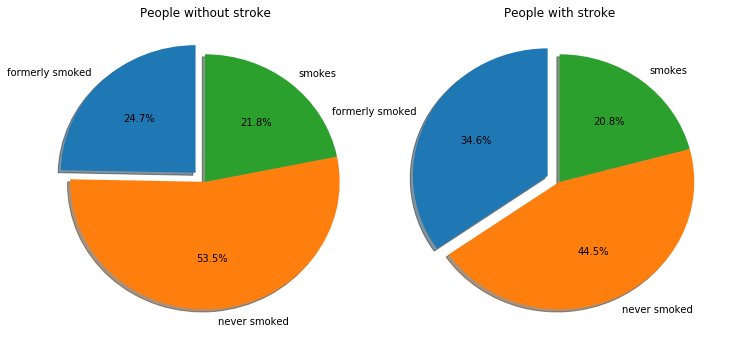

In [456]:
# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
explode = (0.1,0,0) 
ax[0].pie(sizes0, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[0].set_title('People without stroke')
ax[1].pie(sizes1, explode=explode,labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
ax[1].set_title('People with stroke')
plt.tight_layout()
plt.show()

## Part 2: Feature processing

### Drop columns

In [457]:
train_data = train_data.drop(['id','Residence_type'] , axis = 1)

In [458]:
test_data = test_data.drop(['id','Residence_type'] , axis = 1)

### Replace value in column smoking_status and ever_married	

In [459]:
train_data['smoking_status'] = train_data['smoking_status'].map({'never smoked':0, 'formerly smoked':1, 'smokes':2})
test_data['smoking_status'] = test_data['smoking_status'].map({'never smoked':0, 'formerly smoked':1, 'smokes':2})

In [460]:
train_data['ever_married'] = train_data['ever_married'].map({'No':0, 'Yes':1})
test_data['ever_married'] = test_data['ever_married'].map({'No':0, 'Yes':1})

### One Hot Encoding

In [461]:
to_drop = ['gender', 'work_type']

In [462]:
train = train_data.drop(to_drop, axis = 1)

In [463]:
test = test_data.drop(to_drop, axis = 1)

Add catogorical feature: gender,work_type 

In [464]:
one_hot_g = pd.get_dummies(train_data['gender'])

In [465]:
one_hot_g2 = pd.get_dummies(test_data['gender'])

In [466]:
train = train.join(one_hot_g)

In [467]:
test = test.join(one_hot_g2)

In [468]:
one_hot_w = pd.get_dummies(train_data['work_type'])

In [469]:
one_hot_w2 = pd.get_dummies(test_data['work_type'])

In [470]:
train = train.join(one_hot_w)

In [471]:
test = test.join(one_hot_w2)

In [472]:
train.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children
0,3.0,0,0,0,95.12,18.0,NaN,0,0,1,0,0,0,0,0,1
1,58.0,1,0,1,87.96,39.2,0.0,0,0,1,0,0,0,1,0,0
2,8.0,0,0,0,110.89,17.6,NaN,0,1,0,0,0,0,1,0,0
3,70.0,0,0,1,69.04,35.9,1.0,0,1,0,0,0,0,1,0,0
4,14.0,0,0,0,161.28,19.1,NaN,0,0,1,0,0,1,0,0,0


Change column order

In [474]:
train = train[['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'Female',
 'Male',
 'Other',
 'Govt_job',
 'Never_worked',
 'Private',
 'Self-employed',
 'children', 'stroke']]

In [475]:
train.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,stroke
0,3.0,0,0,0,95.12,18.0,NaN,0,1,0,0,0,0,0,1,0
1,58.0,1,0,1,87.96,39.2,0.0,0,1,0,0,0,1,0,0,0
2,8.0,0,0,0,110.89,17.6,NaN,1,0,0,0,0,1,0,0,0
3,70.0,0,0,1,69.04,35.9,1.0,1,0,0,0,0,1,0,0,0
4,14.0,0,0,0,161.28,19.1,NaN,0,1,0,0,1,0,0,0,0


In [476]:
test.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children
0,80.0,0,0,1,83.84,21.1,1.0,0,1,0,0,0,1,0,0
1,74.0,0,1,1,179.50,26.0,1.0,1,0,0,0,0,0,1,0
2,14.0,0,0,0,95.16,21.2,NaN,1,0,0,0,0,0,0,1
3,28.0,0,0,0,94.76,23.4,NaN,0,1,0,0,0,1,0,0
4,63.0,0,0,1,83.57,27.6,0.0,1,0,0,1,0,0,0,0


### Imputation by KNN

In [477]:
from fancyimpute import KNN

In [478]:
column_names = list(train)

In [479]:
column_names_test = list(test)

In [480]:
column_names

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'Female',
 'Male',
 'Other',
 'Govt_job',
 'Never_worked',
 'Private',
 'Self-employed',
 'children',
 'stroke']

In [481]:
column_names_test

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'Female',
 'Male',
 'Other',
 'Govt_job',
 'Never_worked',
 'Private',
 'Self-employed',
 'children']

In [482]:
train = train.as_matrix()

In [483]:
train = pd.DataFrame(KNN(3).fit_transform(train))

Imputing row 1/43400 with 1 missing, elapsed time: 3116.798
Imputing row 101/43400 with 0 missing, elapsed time: 3117.305
Imputing row 201/43400 with 1 missing, elapsed time: 3117.603
Imputing row 301/43400 with 0 missing, elapsed time: 3118.088
Imputing row 401/43400 with 0 missing, elapsed time: 3118.423
Imputing row 501/43400 with 0 missing, elapsed time: 3118.730
Imputing row 601/43400 with 0 missing, elapsed time: 3118.981
Imputing row 701/43400 with 1 missing, elapsed time: 3119.221
Imputing row 801/43400 with 0 missing, elapsed time: 3119.549
Imputing row 901/43400 with 0 missing, elapsed time: 3119.847
Imputing row 1001/43400 with 1 missing, elapsed time: 3120.134
Imputing row 1101/43400 with 0 missing, elapsed time: 3120.457
Imputing row 1201/43400 with 0 missing, elapsed time: 3120.751
Imputing row 1301/43400 with 0 missing, elapsed time: 3120.997
Imputing row 1401/43400 with 0 missing, elapsed time: 3121.280
Imputing row 1501/43400 with 0 missing, elapsed time: 3121.542
Impu

In [484]:
train.columns = column_names

In [485]:
test = test.as_matrix()

In [486]:
test = pd.DataFrame(KNN(3).fit_transform(test))

Imputing row 1/18601 with 0 missing, elapsed time: 98.149
Imputing row 101/18601 with 0 missing, elapsed time: 98.169
Imputing row 201/18601 with 0 missing, elapsed time: 98.176
Imputing row 301/18601 with 1 missing, elapsed time: 98.182
Imputing row 401/18601 with 1 missing, elapsed time: 98.188
Imputing row 501/18601 with 1 missing, elapsed time: 98.196
Imputing row 601/18601 with 1 missing, elapsed time: 98.206
Imputing row 701/18601 with 0 missing, elapsed time: 98.213
Imputing row 801/18601 with 1 missing, elapsed time: 98.227
Imputing row 901/18601 with 0 missing, elapsed time: 98.234
Imputing row 1001/18601 with 1 missing, elapsed time: 98.248
Imputing row 1101/18601 with 2 missing, elapsed time: 98.254
Imputing row 1201/18601 with 0 missing, elapsed time: 98.263
Imputing row 1301/18601 with 1 missing, elapsed time: 98.271
Imputing row 1401/18601 with 1 missing, elapsed time: 98.277
Imputing row 1501/18601 with 1 missing, elapsed time: 98.283
Imputing row 1601/18601 with 1 missi

In [487]:
test.columns = column_names_test

In [488]:
train.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,stroke
0,3.0,0.0,0.0,0.0,95.12,18.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,58.0,1.0,0.0,1.0,87.96,39.2,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,8.0,0.0,0.0,0.0,110.89,17.6,0.326663,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,70.0,0.0,0.0,1.0,69.04,35.9,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,14.0,0.0,0.0,0.0,161.28,19.1,0.681701,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [489]:
test.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children
0,80.0,0.0,0.0,1.0,83.84,21.1,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,74.0,0.0,1.0,1.0,179.50,26.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14.0,0.0,0.0,0.0,95.16,21.2,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,28.0,0.0,0.0,0.0,94.76,23.4,0.776701,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,63.0,0.0,0.0,1.0,83.57,27.6,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [491]:
train.to_csv('clean_train.csv', index = False)

In [494]:
test.to_csv('clean_test.csv', index = False)

References:<br>
https://stackoverflow.com/questions/16923281/pandas-writing-dataframe-to-csv-file<br>
https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-2-222154b4b58e<br>